# mock bins
By Joely Nelson

Contact: joelyn@cs.washington.edu

This notebook is used to generate "mock bins", the fluorescence expected to be output by the Illumina sequencer/cell sorting for various guides.

We assume that for each cell with a given guide, it will fluoresce at a value within a gaussian distribution. We assume that there will be ``reads`` different cells for this guide that will be sorted by the cell sorter. 

In real life, the cell sorter is not able to determine the exact fluorescence produced by an given cell, instead it will be able to determine it's range. For example, the cell sorter will be unable to say "this cell had a fluorescence of 100, but instead will say it fell within the range of 50-100. The amount of resolution we expect the sequencer to have is determined by ``n_bins``. The highest fluorescence expected by the cell sorter is ``max_f``.

This notebook will output a file representing the binned histograms fopr each guide, as well as a file containing the true mean and variance for each guide.

#### Pipeline Visalization
![](.\\documentation\\mock_bins_pipeline.png)

#### Parameters
This file takes in the following parameters:

* ``fname`` the file name to be read. It should have a column "ID" which is unique for every guide variant.
* ``reads`` the number of reads per guide. How many data points would be generated per guide
* ``n_bins`` the number of bins to be generated
* ``max_f`` the maximum fluorescence that we expect for binning

#### Outputs
For each named guide in the given file, a random mean and variance is generated. These means and variances are used to generate mock flourescent data using a gaussian distribution. This data is then binned. The histogram data is exported as a xlsx file, as well as the true means and variances for each guide. The output file will be saved in ``data/mock_bins_counts.xlsx``

The true mean and variance for each guide is saved in the file ``data/mock_bins_params.xlsx``


#### Example

The ``fname`` is expected to be an excel file that might look something like this

|   | Library |            ID |                                          Sequence |               Spacer | PAM | Position | Strand |
|--:|--------:|--------------:|--------------------------------------------------:|---------------------:|----:|---------:|-------:|
| 0 | 1_poxB  | poxBp_T7_TGT  | CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT... | TCCGTCAGATGAACTAAACT | TGT | 7.0      | Top    |
| 1 | 1_poxB  | poxBp_T17_GAA | CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT... | CCCTTCCCCCTCCGTCAGAT | GAA | 17.0     | Top    |
| 2 | 1_poxB  | poxBp_T18_TGA | CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT... | TCCCTTCCCCCTCCGTCAGA | TGA | 18.0     | Top    |
| 3 | 1_poxB  | poxBp_T20_GAT | CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT... | CATCCCTTCCCCCTCCGTCA | GAT | 20.0     | Top    |
| 4 | 1_poxB  | poxBp_T21_AGA | CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT... | CCATCCCTTCCCCCTCCGTC | AGA | 21.0     | Top    |

The important field is that of the ID column

For our other parameters, let's say we have:
```
reads = 15000
n_bins = 10
max_f = 10000
```

The output saved to ``data/mock_bins_counts.xlsx`` would look like this:

|            ID |   0 |  1000 |   2000 |   3000 |   4000 |   5000 |   6000 |   7000 | 8000 | 9000 |
|--------------:|----:|------:|-------:|-------:|-------:|-------:|-------:|-------:|-----:|-----:|
|  poxBp_T7_TGT | 6.0 | 559.0 | 5172.0 | 7461.0 | 1741.0 |   61.0 |    0.0 |    0.0 |  0.0 | 0.0  |
| poxBp_T17_GAA | 0.0 |   0.0 |    3.0 |   96.0 | 1938.0 | 7422.0 | 4942.0 |  586.0 | 13.0 | 0.0  |
| poxBp_T18_TGA | 0.0 |   1.0 |   93.0 | 1298.0 | 5064.0 | 6162.0 | 2148.0 |  230.0 |  4.0 | 0.0  |
| poxBp_T20_GAT | 0.0 |   0.0 |    1.0 |   93.0 | 1576.0 | 6170.0 | 5734.0 | 1354.0 | 69.0 | 3.0  |
| poxBp_T21_AGA | 0.0 |   9.0 |  274.0 | 2858.0 | 6992.0 | 4239.0 |  606.0 |   22.0 |  0.0 | 0.0  |
|           ... | ... |   ... |    ... |    ... |    ... |    ... |    ... |    ... |  ... | ...  |
|   J3_B195_CGC | 0.0 |  83.0 | 1363.0 | 5877.0 | 6013.0 | 1569.0 |   94.0 |    1.0 |  0.0 | 0.0  |
|   J3_B197_CAA | 0.0 |   3.0 |  495.0 | 5398.0 | 7681.0 | 1393.0 |   29.0 |    1.0 |  0.0 | 0.0  |
|   J3_B201_TGC | 0.0 |   0.0 |   10.0 |  277.0 | 2954.0 | 7155.0 | 4063.0 |  526.0 | 15.0 | 0.0  |
|         J3_OT | 0.0 |   0.0 |    2.0 |  194.0 | 3134.0 | 7945.0 | 3457.0 |  262.0 |  6.0 | 0.0  |
| J3_OT_mutTATA | 0.0 |   0.0 |    0.0 |   18.0 |  936.0 | 6037.0 | 6672.0 | 1292.0 | 45.0 | 0.0  |

The output saved to ``data/mock_bins.params.xlsx`` would look like:

|            ID |        Mean |   Variance |
|--------------:|------------:|-----------:|
| poxBp_T7_TGT  | 3197.981694 | 675.965454 |
| poxBp_T17_GAA | 5767.974676 | 706.882804 |
| poxBp_T18_TGA | 5142.343422 | 854.816014 |
| poxBp_T20_GAT | 5963.503534 | 795.546748 |
| poxBp_T21_AGA | 4639.914297 | 785.172958 |
| ...           | ...         | ...        |
| J3_B195_CGC   | 4023.553637 | 796.059613 |
| J3_B197_CAA   | 4169.147612 | 638.928781 |
| J3_B201_TGC   | 5611.93888  | 773.825383 |
| J3_OT         | 5529.450726 | 703.203954 |
| J3_OT_mutTATA | 6058.197958 | 686.367314 |

#### Other Features of this Notebook
Visualizations to provide sanity checks that the mock data looks similiar to what one might expect from a real life scenario.
* Allows user to view the distribution of the fluorescence for each guide at a higher resolution than the cell sorter would allow for.
* Allows user to view the distribution of the fluorescence for each guide at the same resolution that the cell sorter would allow for.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parameters
These parameters specify what parameters you want to use for the rest of the program.
* ``fname`` the file name to be read. It should have a column ID which is unique for every guide variant
* ``reads`` the number of reads per guide. How many data points would be generated per guide
* ``n_bins`` the number of bins to be generated
* ``max_f`` the maximum flouresence that we expect for binning

In [2]:
fname = 'data/20191118-Sequences for synthesis_v2_VALIDATED.xlsx'
reads = 15000
n_bins = 10
max_f = 10000

### Printouts

In [3]:
df = pd.read_excel(fname)
df.head()

,Unnamed: 0,Library,ID,Sequence,Spacer,PAM,Position,Strand
0,0,1_poxB,poxBp_T7_TGT,CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT...,TCCGTCAGATGAACTAAACT,TGT,7.0,Top
1,1,1_poxB,poxBp_T17_GAA,CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT...,CCCTTCCCCCTCCGTCAGAT,GAA,17.0,Top
2,2,1_poxB,poxBp_T18_TGA,CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT...,TCCCTTCCCCCTCCGTCAGA,TGA,18.0,Top
3,3,1_poxB,poxBp_T20_GAT,CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT...,CATCCCTTCCCCCTCCGTCA,GAT,20.0,Top
4,4,1_poxB,poxBp_T21_AGA,CTGAAGTCAGCCCCATACGATATAAGTTGTTACTAGATTGACAGCT...,CCATCCCTTCCCCCTCCGTC,AGA,21.0,Top


In [4]:
# the total number of entries in the dataset
len(df)

1732

In [5]:
# the total amount of reads generated total for the whole data set
len(df) * reads 

25980000

## Helper Functions
These functions help bin and graph values

In [6]:
def bin_values(x, n_bins, max_f):
    '''
    Bins values as the cell sorter will.
    
    ARGS:
        -x: (arr) the data as a numpy array
        -n_bins: (int) number of bins
        -max_f: (number) the max flourescence value
        
    RETURNS:
        Tuple with two lists. Each list will be length n_bins
            -A list of the labels for the bins. Will start at 0,
             and go up to max_f.
            -Associated count for each of the bins.
        For index i, count[i] represents the count of all values
        from x that fell in between the values label[i] and
        label[i+1] - 1.
        For the last index, index n_bins - 1, this represents
        the count of all values from x that fell between
        label[n_bins - 1] and infinity.
        
    EXAMPLE USAGE:
        Code:
            x = np.array([-1, 0, 1, 5500, 500, 10000, 12000])
            bins, counts = bin_values(x, 10, 10000)
            print("bins", bins)
            print("counts", counts)
        Output:
            bins [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
            counts [4, 0, 0, 0, 0, 1, 0, 0, 0, 2]        
    '''
    
    step = int(max_f / n_bins)
    bins = [int(i) for i in range(0, max_f + step, step)]
    
    counts = []        
    
    # regular case for everything within the bounds
    for i in range(n_bins):
        counts.append(len(x[(x >= bins[i]) & (x < bins[i + 1])]))
        
    # special case for things outside the bounds
    counts[0]  = counts[0] + len(x[x < 0])
    counts[-1] = counts[-1] + len(x[x >= bins[-1]])
    
    return bins[:len(counts)], counts    

In [7]:
def gen_hist(bins, counts, labels = True):
    '''
    Graphs a histogram given bins and counts
    ARGS:
        -bins: A list of bins of length n_bins.
        -counts: A list of counts of length n_bins.
         For index i, count[i] represents the count of all values
         from x that fell in between the values label[i] and
         label[i+1] - 1.
         For the last index, index n_bins - 1, this represents
         the count of all values from x that fell between
         label[n_bins - 1] and infinity.
        -labels: (bool) if True, will display labels.
                 If False, does not show labels.
    '''
    assert(len(bins) == len(counts)), "length of bins and counts must be the same. len(counts) = " + str(len(counts)) + "len(bins) = " + str(len(bins)) 
    
    y_pos = np.arange(len(bins))
    plt.bar(y_pos, counts, align='edge')
    
    if labels:
        plt.xticks(y_pos, bins,  rotation='vertical')
    
    plt.ylabel('Counts')
    plt.xlabel('Fluorescence')
    plt.show()
    plt.close()

#### Example Usage

bins [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
counts [4, 0, 0, 0, 0, 1, 0, 0, 0, 2]


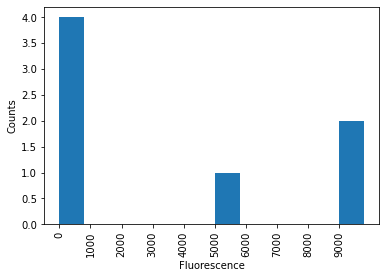

In [23]:
# Say we are given the following list of flourecent values:
x = np.array([-1, 0, 1, 5500, 500, 10000, 12000])

# we want to bin it into 10 bins and we know the maximum flourescence is 10000
bins, counts = bin_values(x, 10, 10000)
print("bins", bins)
print("counts", counts)

# graph the histogram
gen_hist(bins, counts)

# Exploration
We place any exploratory steps here that are used to determine things about the final data generation, but are not used in the generation itself.

## Data Exploration
Here I want to double check if their is a column that can be considered a unique identifier for every row. If the length of the dataframe, and the number of unique values is the same, that is an indicator that this is so.

The file I used in this analysis was ```data/20191118-Sequences for synthesis_v2_VALIDATED.xlsx```. I found that a unique column was ``"ID"`` and so I will use this as the unique identifier for the analysis.

In [9]:
len(df), df['ID'].nunique()

(1732, 1732)

# Generate Data

### Generating gaussian parameters
For each guide, generate associated gaussian parameters (mean + variance).

In [10]:
# set a seed so this runs the same way each time
np.random.seed(seed=363)

# n_guides: the number of guides in this set 
n_guides = len(df)


# you can mess around with these numbers to change how mu and sigma are generated
# both will come from uniform distributions

mu_low = 2750
mu_high = 7000

sigma_low = 600
sigma_high = 900


# generate the mus and sigmas for each guides
# mu and sigma will be a vector of length n_guides
mu = np.random.uniform(low=mu_low, high=mu_high, size=n_guides)
sigma = np.random.uniform(low=sigma_low, high=sigma_high, size=n_guides)


# To make things easier, ensure that these are all positive
mu = abs(mu)
sigma = abs(sigma)

### Generating data
For each guide, we use its associated mean and sigma to generate ```reads``` number of data points. This gets stored in a 2D array called ``data``. ``data[i][j]`` is the value for guide ``i`` for replicate ``j``

In [11]:
np.random.seed(seed=363)

data = np.zeros((n_guides, reads))
for i in range(n_guides):
    data[i] = np.random.normal(mu[i], sigma[i], reads)    

### Viewing "Raw" Data
The following two cells are intended to sanity check the distributions to see if they look like real distributions we expect from each guide.

In order to use this code, first run the cell j = 0, then each time you run the second cell, you will see the distribution for the next guide.

In [12]:
j = 0

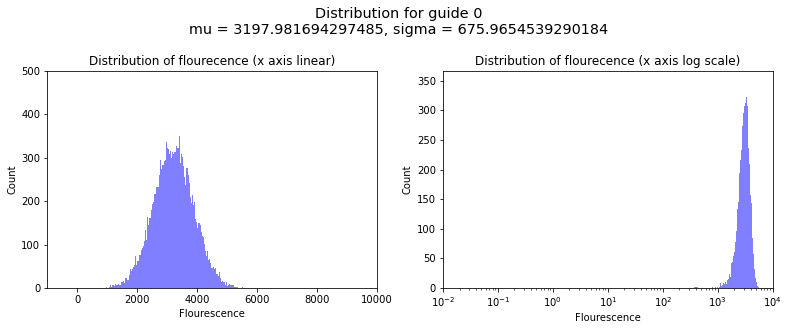

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))

st = fig.suptitle("Distribution for guide " + str(j) + "\nmu = " + str(mu[j]) + ", sigma = " + str(sigma[j]), fontsize="x-large")
st.set_y(1.1)

# TODO: check if setting some params (like num bins, the xlim and ylim) is ok to do manually?

# Graph with x-axis linear
ax1.set_title("Distribution of flourecence (x axis linear)")
ax1.hist(data[j], 150, facecolor='blue', alpha=0.5)
ax1.set_xlim(-1000, 10000)
ax1.set_ylim(0, 500)
ax1.set_xlabel("Flourescence")
ax1.set_ylabel("Count")


ax2.set_title("Distribution of flourecence (x axis log scale)")
ax2.hist(data[j], 150, facecolor='blue', alpha=0.5)
ax2.set_xscale('log')
ax2.set_xlim(10**-2, 10**4)
ax2.set_xlabel("Flourescence")
ax2.set_ylabel("Count")

    
# update to look at next guide
j+= 1

### Bin Data
For each guide, we bin it into ``n_bins`` bins with the max value being ``max_f`` stored in a data structure called ``data_counts``.

``data_counts`` is a 2D array where ``data_counts[i][j]`` is the binned value for guide ``i`` for bin ``j``.

In [14]:
# this first line is to just figure out how big the final data structure, data_counts
# needs to be
bins, counts = bin_values(data[0], n_bins, max_f)
data_counts = np.zeros((n_guides, len(bins)))

for i in range(len(data)):
    data_counts[i] = bin_values(data[i], n_bins, max_f)[1]

### Viewing the Binned Data
The following two cells are intended to sanity check the binned histograms.

In order to use this code, first run the cell j = 0, then each time you run the second cell, you will see the histofram for the next guide.

In [15]:
j = 0

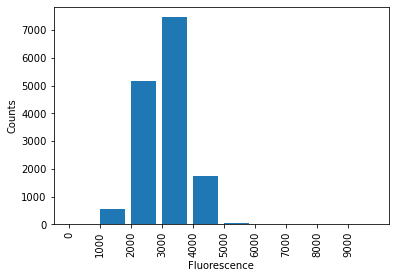

In [16]:
gen_hist(bins, data_counts[j])
j += 1

# Exporting Data
Data is exported to an excel format

In [17]:
# get an array of all guide ids
# we'll use this as a key so it can be joined with data later
ids = np.array(df['ID'])
ids.shape = (ids.shape[0], 1)

### Known means and vars
Export the known mus and sigmas to a file so we will be able to sanity check this later

In [18]:
mu.shape = (mu.shape[0], 1)
sigma.shape = (sigma.shape[0], 1)

# concat the data so it has a label
d_params = np.concatenate((ids, mu, sigma), axis=1)

# create the dataframe + export
df_params = pd.DataFrame(data=d_params, columns=['ID', 'Mean', 'Variance'])
df_params.to_excel('data/mock_bins_params.xlsx')
df_params

,ID,Mean,Variance
0,poxBp_T7_TGT,3197.981694,675.965454
1,poxBp_T17_GAA,5767.974676,706.882804
2,poxBp_T18_TGA,5142.343422,854.816014
3,poxBp_T20_GAT,5963.503534,795.546748
4,poxBp_T21_AGA,4639.914297,785.172958
...,...,...,...
1727,J3_B195_CGC,4023.553637,796.059613
1728,J3_B197_CAA,4169.147612,638.928781
1729,J3_B201_TGC,5611.93888,773.825383
1730,J3_OT,5529.450726,703.203954


### Data Binned

In [19]:
# concat the id with the counts
d_bins = np.concatenate((ids, data_counts), axis=1)

# create the columns
columns = ['ID'] + bins

# create the dataframe and export it
df_bins = pd.DataFrame(data=d_bins, columns= columns)
df_bins.to_excel("data/mock_bins_counts.xlsx")
df_bins

,ID,0,1000,2000,3000,4000,5000,6000,7000,8000,9000
0,poxBp_T7_TGT,6.0,559.0,5172.0,7461.0,1741.0,61.0,0.0,0.0,0.0,0.0
1,poxBp_T17_GAA,0.0,0.0,3.0,96.0,1938.0,7422.0,4942.0,586.0,13.0,0.0
2,poxBp_T18_TGA,0.0,1.0,93.0,1298.0,5064.0,6162.0,2148.0,230.0,4.0,0.0
3,poxBp_T20_GAT,0.0,0.0,1.0,93.0,1576.0,6170.0,5734.0,1354.0,69.0,3.0
4,poxBp_T21_AGA,0.0,9.0,274.0,2858.0,6992.0,4239.0,606.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1727,J3_B195_CGC,0.0,83.0,1363.0,5877.0,6013.0,1569.0,94.0,1.0,0.0,0.0
1728,J3_B197_CAA,0.0,3.0,495.0,5398.0,7681.0,1393.0,29.0,1.0,0.0,0.0
1729,J3_B201_TGC,0.0,0.0,10.0,277.0,2954.0,7155.0,4063.0,526.0,15.0,0.0
1730,J3_OT,0.0,0.0,2.0,194.0,3134.0,7945.0,3457.0,262.0,6.0,0.0
